<a href="https://colab.research.google.com/github/AugustinCablant/Viager/blob/main/stat_des.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vendeurs.csv')

In [54]:
# Trier les colonnes 

vendeurs = df.copy()

vendeurs = vendeurs[['b_sexe',
 'acte',
 'b_annee',
 'b_mois',
 'b_jour',
 'b_dep',
 'd_annee',
 'd_mois',
 'd_jour',
 'd_dep',
 'age_deces',
 'type_de_viager',
 'majoration',
 'bouquet',
 'rente',
 'indexation_rente',
 'date_acte_authentique',
 'chambre_de_bonnes',
 'nb_pieces',
 'etage',
 'mettres_carres',
 'ascenseur',
 'parking_box',
 'cave',
 'date_immeuble',
 'pierre_de_taille',
 'source',
 'ch_de_service',
 'parking',
 'bonus',
 'type',
 'reprise',
 'limite',
 'euro',
 'franc',
 'annee',
 'downp',
 'annuity',
 'head',
 'dateN',
 'dateD',
 'dateA',
 'jd',
 'nb_tete',
 'b_dateD',
 'Td',
 'rtrunc',
 'ltrunc',
 'Ts',
 'Tr',
 'fd',
 'old_bcode',
 'old_dcode',
 'old_b_dep',
 'old_d_dep',
 'old_b_ville',
 'region',
 'latitude',
 'longitude',
 'b_dateN',
 'Tr_dif',
 'Tr_seller']]

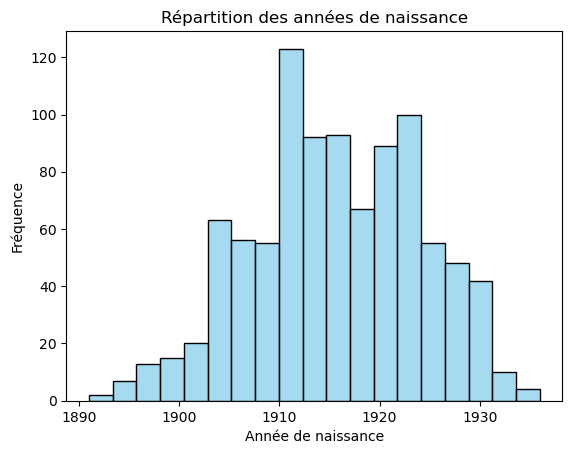

In [3]:
np.random.seed(42)

# Créer l'histogramme avec Seaborn
sns.histplot(df['b_annee'], kde=False, color='skyblue', edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('Année de naissance')
plt.ylabel('Fréquence')
plt.title('Répartition des années de naissance')

# Afficher l'histogramme
plt.show()

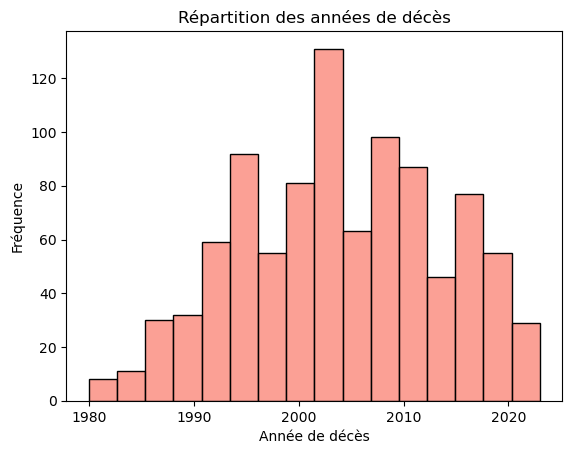

In [4]:
np.random.seed(42)

# Créer l'histogramme avec Seaborn
sns.histplot(df['d_annee'], kde=False, color='salmon', edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('Année de décès')
plt.ylabel('Fréquence')
plt.title('Répartition des années de décès')

# Afficher l'histogramme
plt.show()

/Users/augustincablant/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


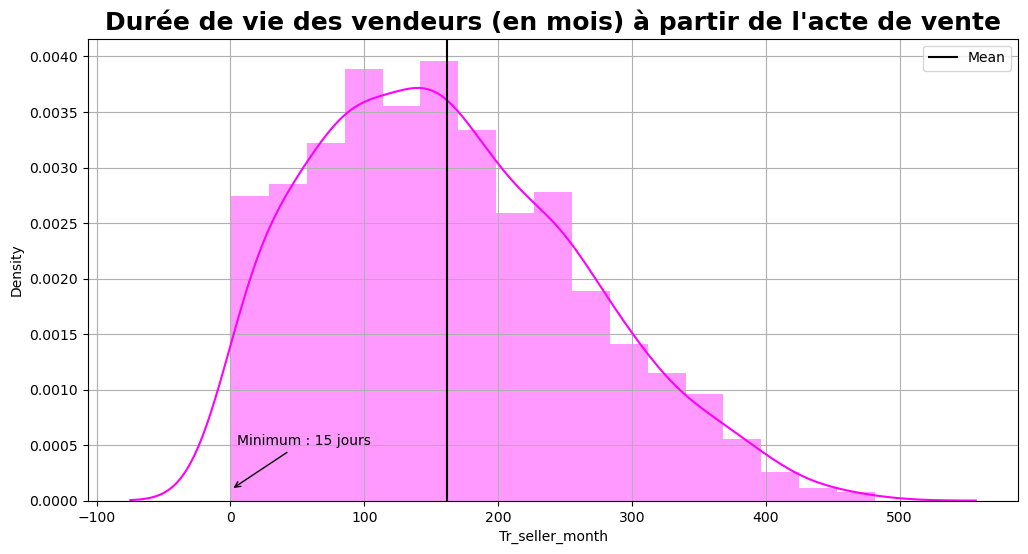

In [56]:
# Relation target/age 

def get_colors(num_colors):
    color_map = plt.cm.get_cmap('tab20')  
    colors = color_map(np.linspace(0, 1, num_colors))
    return colors

vendeurs['Tr_seller_month'] = vendeurs['Tr_seller'] / 30 
#plt.plot(vendeurs['Tr_seller_mo'])
plt.figure(figsize = (12,6))
plt.annotate("Minimum : 15 jours", xy=(0.5, 0.0001), xytext=(5, 0.0005),
            arrowprops=dict(facecolor='black', arrowstyle='->'))
sns.distplot(vendeurs['Tr_seller_month'], color = 'magenta')
plt.axvline(162, label = 'Mean', color = 'black')
#vendeurs['Tr_seller_month'].plot(kind = 'hist', label = "Durée de vie des vendeurs (en mois) à partir de l'acte de vente", bins=15, alpha = 0.7, color = colors)
plt.grid(True)
plt.legend()
plt.title("Durée de vie des vendeurs (en mois) à partir de l'acte de vente", fontsize=18, fontweight='bold')
plt.show()

/Users/augustincablant/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/augustincablant/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


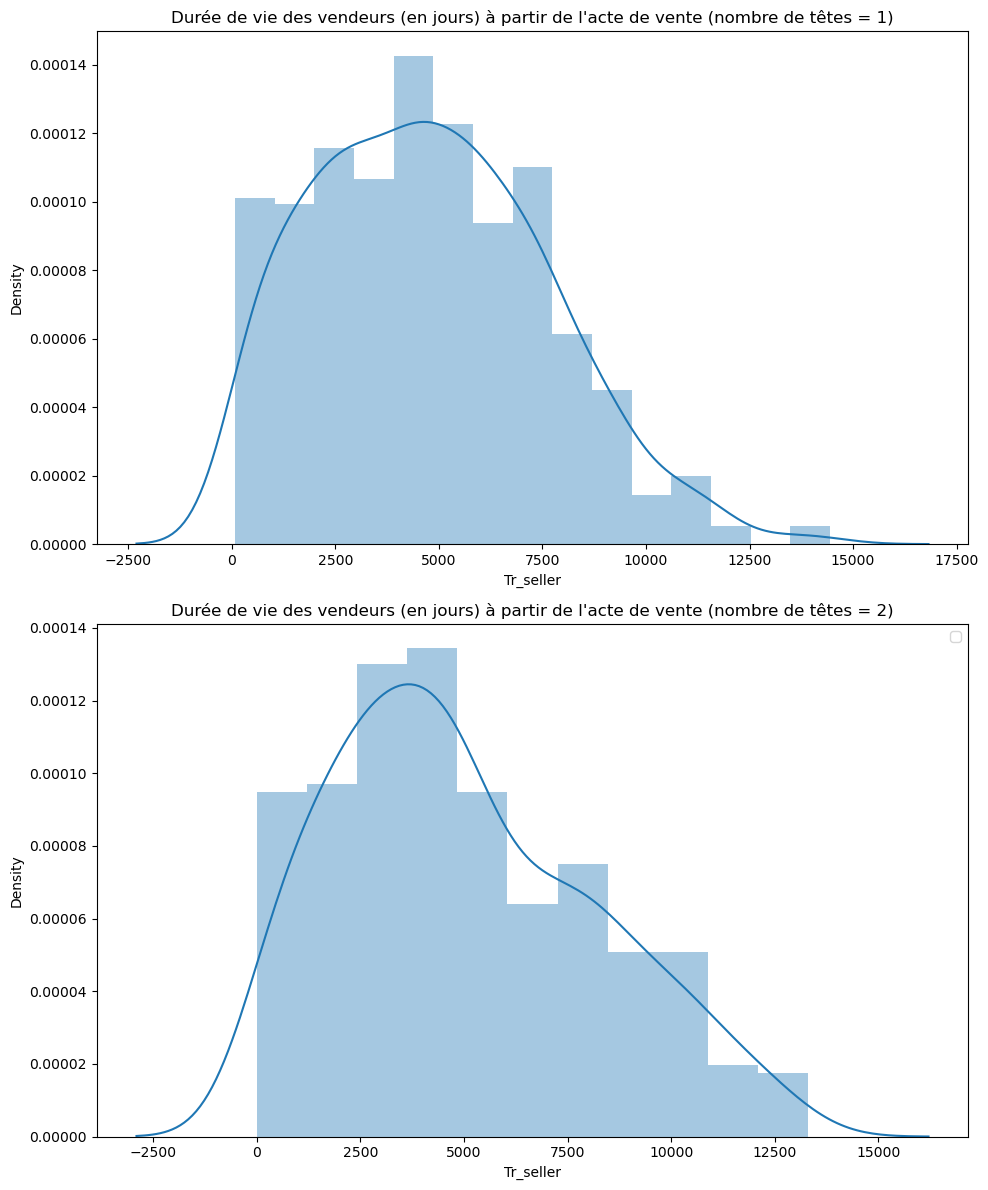

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
for i, t in enumerate(vendeurs['nb_tete'].unique()): 
    sub_vendeurs = vendeurs[vendeurs['nb_tete']==t]
    sns.distplot(sub_vendeurs['Tr_seller'], ax=axes[i])
    axes[i].set_title(f"Durée de vie des vendeurs (en jours) à partir de l'acte de vente (nombre de têtes = {t})")


plt.tight_layout()
plt.legend()
plt.show()

In [94]:
vendeurs['nb_tete'].describe()

count    954.000000
mean       1.394130
std        0.488919
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: nb_tete, dtype: float64

/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_2516/2277936735.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_vendeurs['revenue'] = sub_vendeurs['annuity'] * sub_vendeurs['Tr_seller_month'] + sub_vendeurs['downp']
/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_2516/2277936735.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_vendeurs['age_acte'] = sub_vendeurs['d_annee'] - sub_vendeurs['annee']
/Users/augustincablant/opt/anaconda3/lib/python3.9/site-packages/seaborn/

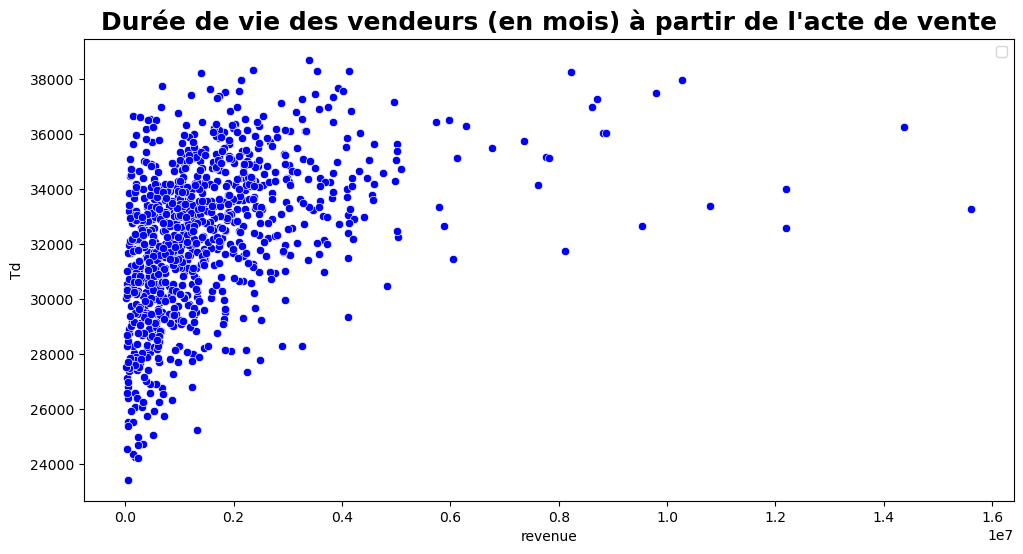

In [57]:
sub_vendeurs = vendeurs.copy()
# Normalization
sub_vendeurs['downp'] = (sub_vendeurs['downp'] - sub_vendeurs['downp'].min()) / (sub_vendeurs['downp'].max() - sub_vendeurs['downp'].min())
sub_vendeurs['annuity'] = (sub_vendeurs['annuity'] - sub_vendeurs['annuity'].min()) / (sub_vendeurs['annuity'].max() - sub_vendeurs['annuity'].min())
sub_vendeurs['Tr_seller_month'] = (sub_vendeurs['Tr_seller_month'] - sub_vendeurs['Tr_seller_month'].min()) / (sub_vendeurs['Tr_seller_month'].max() -sub_vendeurs['Tr_seller'].min())
sub_vendeurs['Tr_seller'] = (sub_vendeurs['Tr_seller'] - sub_vendeurs['Tr_seller'].min()) / (sub_vendeurs['Tr_seller'].max() -sub_vendeurs['Tr'].min())
sub_vendeurs['revenue'] = sub_vendeurs['annuity'] * sub_vendeurs['Tr_seller_month'] + sub_vendeurs['downp']

sub_vendeurs = vendeurs[vendeurs['annuity']<200000]

sub_vendeurs['revenue'] = sub_vendeurs['annuity'] * sub_vendeurs['Tr_seller_month'] + sub_vendeurs['downp']
sub_vendeurs['age_acte'] = sub_vendeurs['d_annee'] - sub_vendeurs['annee']
plt.figure(figsize = (12,6))
#plt.annotate("Minimum : 15 jours", xy=(0.5, 0.0001), xytext=(5, 0.0005),
            #arrowprops=dict(facecolor='black', arrowstyle='->'))
sns.scatterplot(sub_vendeurs['revenue'], sub_vendeurs['Td'], color = 'blue')
#plt.axvline(162, label = 'Mean', color = 'black')
plt.legend()
plt.title("Durée de vie des vendeurs (en mois) à partir de l'acte de vente", fontsize=18, fontweight='bold')
plt.show()

In [48]:
sub_vendeurs['revenue'].describe()

count    9.530000e+02
mean     1.555620e+06
std      1.673082e+06
min      1.262278e+04
25%      5.158875e+05
50%      1.101853e+06
75%      2.064312e+06
max      1.561529e+07
Name: revenue, dtype: float64

<AxesSubplot:>

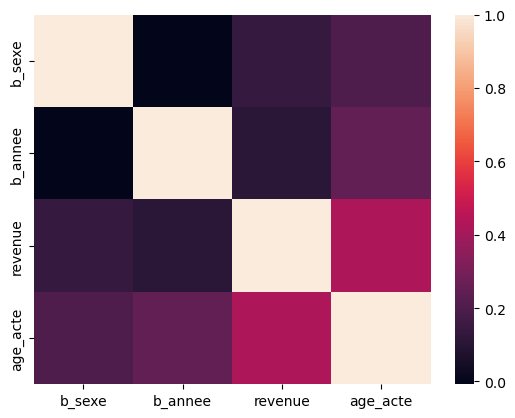

In [67]:
sub = sub_vendeurs[['b_sexe','b_annee','revenue','age_acte']]
color_map = plt.cm.get_cmap('tab20')  
sns.heatmap(sub.corr(), color = color_map(np.linspace(0, 1, 4)))